In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [41]:
class MachCone(object):
    def __init__(self,u,v,a,tau,quad,face,loc):
        self.tau = tau
        self.u_tilde = u
        self.v_tilde = v
        self.e1 = e1
        self.e2 = e2
        self.a_tilde = a
        self.quad = quad
        
    def plot(self):
        fig, ax = plt.subplots(figsize=(8,8))
        ax.set_aspect('equal')
        
        plt.arrow(x=e1[0],y=e1[1],dx=.5,dy=.5, width=.005, color='k')

        plt.plot(self.quad[0,:],self.quad[1,:])
        plt.show()

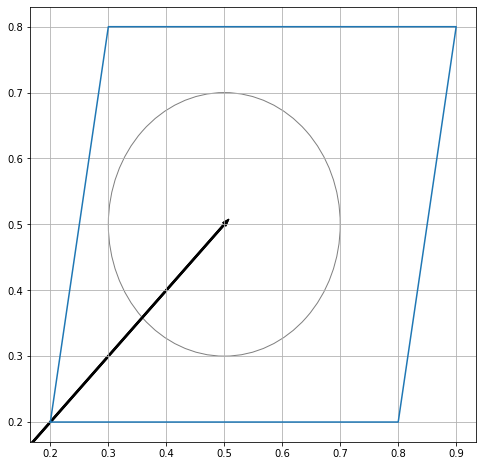

In [2]:
x = [.2,.8,.9,.3]; x.append(x[0])
y = [.2,.2,.8,.8]; y.append(y[0])

quad = np.array([x,y])

circle = plt.Circle((0.5, 0.5), 0.2, color='grey', fill=False)

fig, ax = plt.subplots(figsize=(8,8))
edge1 = plt.arrow(x=0,y=0,dx=.5,dy=.5, width=.0025, color='k')

plt.plot(quad[0,:],quad[1,:])
plt.grid(True)
ax.add_artist(circle)
ax.add_artist(edge1)
plt.show()

In [14]:
e1 = [0 ,-3]
e2 = [3 , 0]
e3 = [0 , 3]
e4 = [-3, 0]
p = [.04,.04]

print('cell 1', np.cross(p,e4), np.cross(e1,p), np.cross(p,e4) <=0 and np.cross(e1,p) <= 0)
print('cell 2', np.cross(p,e1), np.cross(e2,p), np.cross(p,e1) <=0 and np.cross(e2,p) <= 0)
print('cell 3', np.cross(p,e2), np.cross(e3,p), np.cross(p,e2) <=0 and np.cross(e3,p) <= 0)
print('cell 4', np.cross(p,e3), np.cross(e4,p), np.cross(p,e3) <=0 and np.cross(e4,p) <= 0)

cell 1 0.12 0.12 False
cell 2 -0.12 0.12 False
cell 3 -0.12 -0.12 True
cell 4 0.12 -0.12 False


In [12]:
np.cross(p,e4) <=0 and np.cross(e1,p) <= 0

False

In [16]:
np.dot([2,2],[1,5])

12

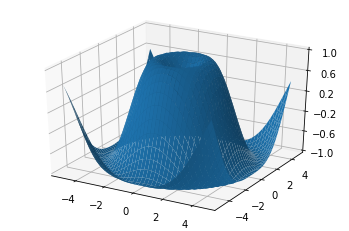

In [47]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Create an empty array of strings with the same shape as the meshgrid, and
# populate it with two colors in a checkerboard pattern.
colortuple = ('y', 'b')
colors = np.empty(X.shape, dtype=str)
for y in range(ylen):
    for x in range(xlen):
        colors[x, y] = colortuple[(x + y) % len(colortuple)]

# Plot the surface with face colors taken from the array we made.
surf = ax.plot_surface(X, Y, Z, linewidth=0)

# Customize the z axis.
ax.set_zlim(-1, 1)
ax.w_zaxis.set_major_locator(LinearLocator(6))

plt.show()

(1601,) (1601,) (80, 20) (20,) (1601,)


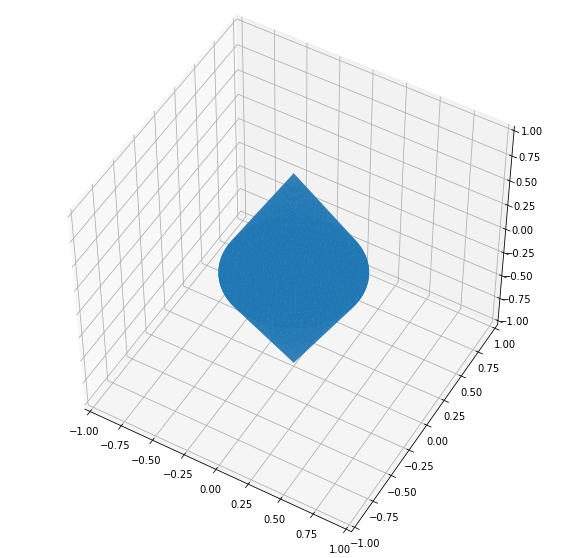

In [48]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import colorsys
from matplotlib.tri import Triangulation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


n_angles = 80
n_radii = 20


# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.0, 0.5, n_radii)


# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)


# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = 1+-np.sqrt(x**2+y**2)*2

print(x.shape, y.shape, angles.shape, radii.shape, z.shape)
# NOTE: This assumes that there is a nice projection of the surface into the x/y-plane!
tri = Triangulation(x, y)
triangle_vertices = np.array([np.array([[x[T[0]], y[T[0]], z[T[0]]],
                                        [x[T[1]], y[T[1]], z[T[1]]],
                                        [x[T[2]], y[T[2]], z[T[2]]]]) for T in tri.triangles])

x2 = np.append(0, (radii*np.cos(angles)).flatten())
y2 = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z2 = -1+np.sqrt(x**2+y**2)*2

# NOTE: This assumes that there is a nice projection of the surface into the x/y-plane!
tri2 = Triangulation(x2, y2)
triangle_vertices2 = np.array([np.array([[x2[T[0]], y2[T[0]], z2[T[0]]],
                                        [x2[T[1]], y2[T[1]], z2[T[1]]],
                                        [x2[T[2]], y2[T[2]], z2[T[2]]]]) for T in tri2.triangles])

triangle_vertices = np.concatenate([triangle_vertices, triangle_vertices2])
midpoints = np.average(triangle_vertices, axis=1)

coll = Poly3DCollection(
    triangle_vertices, edgecolors=None)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.add_collection(coll)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.elev = 50
plt.show()